## Imports

In [2]:
import os
os.chdir('C:/Users/jackj/OneDrive/Documents/MSc/ML2/Coursework 3 - CNN/genres')
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import random
from keras import utils
from sklearn.preprocessing import LabelEncoder, StandardScaler

Using TensorFlow backend.
C:\Users\jackj\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jackj\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jackj\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jackj\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

## Functions

In [2]:
def random_track():
    req_title_len = 5
    track = str(random.randint(1,100))
    title_len = len(track)
    req_filler_zeros = req_title_len - title_len
    filler_zeros = req_filler_zeros * str(0)
    filename = '.'+filler_zeros+str(track)+'.wav'
    return filename  

def show_mel_spectrogram(genre):
    track = random_track()
    file = genre+'/'+genre+track
    y, sr = librosa.load(file, sr=22050)
    spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
    spect = librosa.power_to_db(spect, ref=np.max)
    librosa.display.specshow(spect)
    mean = np.mean(spect)
    std = np.std(spect)
    spect_std = (spect-mean)/std
    return spect_std

def main(genres, n_fft, hop_length):
    X_spect, music_class = create_mel_spectrograms(genres, n_fft, hop_length)
    n_classes = len(genres)
    X,y = reshape_and_encode(X_spect, music_class, n_classes)
    np.save('X.npy', X)
    np.save('y.npy', y)
    return X, y
    
def create_mel_spectrograms(genres, n_fft, hop_length):
    X_spect = np.empty((0, 128, 1290))
    music_class = []
    for genre in genres:
        for filename in os.listdir(genre):
            y, sr = librosa.load(genre+'/'+filename, sr=22050)
            spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=n_fft, hop_length=hop_length)
            spect = librosa.power_to_db(spect, ref=np.max)
            spect = spect[:,:1290]
            mean = np.mean(spect)
            std = np.std(spect)
            spect_std = (spect-mean)/std
            X_spect = np.append(X_spect, [spect_std], axis=0)
            music_class.append(genre)  
    return X_spect, music_class

def reshape_and_encode(X_spect, music_class, n_classes):
    X = X_spect[:, np.newaxis, :, :,]
    encoder = LabelEncoder()
    y = encoder.fit_transform(music_class)
    y = utils.np_utils.to_categorical(y, n_classes)
    return X, y


## Create dataset

In [40]:
# Chosen 5 genres to limit training time
genres = ['blues', 'classical', 'hiphop', 'metal', 'disco']
n_fft = 2048
hop_length = 512 

X, y = main(genres, n_fft, hop_length)

NameError: name 'np_utils' is not defined

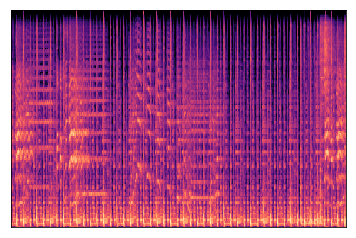

In [7]:
# Example of what a melospectrogram looks like
spect = show_mel_spectrogram('disco')

In [17]:
# Image shape
spect.shape

(128, 1293)